# Define Data folder

In [6]:
data_folder='Data/'

In [7]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import matplotlib.pyplot as plt
import numpy as np
pandas2ri.activate()

readRDS = robjects.r['readRDS']


In [8]:
df_ms2 = readRDS(data_folder+'mutation_vec_ms2.rds')
df_ms3 = readRDS(data_folder+'mutation_vec_ms3.rds')
df_ms4 = readRDS(data_folder+'mutation_vec_ms4.rds')
df_ms5 = readRDS(data_folder+'mutation_vec_ms5.rds')
df_fake = readRDS(data_folder+'mutation_vec_fake_new.rds')


In [9]:

plt.ion()
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(np.hstack((df_ms2,df_ms4,df_ms3,df_ms5))  , color='lightblue',ec='k', bins='auto',alpha=0.5)  # arguments are passed to np.histogram
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Minimum number of shared mutations')
ax.tick_params(labelsize=15)
ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)


In [10]:
bins=np.arange(0, 50, 2)

In [11]:
dist2nearesthistA=np.histogram(np.hstack((df_ms2,df_ms4,df_ms3,df_ms5)),bins=bins)
dist2nearesthistB=np.histogram(df_fake[:455],bins=bins)

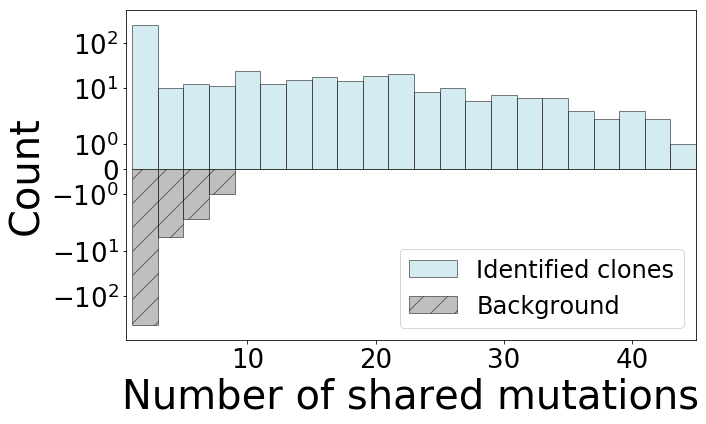

In [12]:
plt.ion()
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(dist2nearesthistA[1][1:],dist2nearesthistA[0], color='lightblue',ec='k', alpha=0.5,width=2,label='Identified clones') 
ax.bar(dist2nearesthistB[1][1:],-dist2nearesthistB[0], color='grey',ec='k', alpha=0.5,width=2,hatch='/',label='Background') 
ax.set_xlim([0.5, 45])
plt.yscale('symlog')
plt.ylabel('Count')
plt.xlabel('Number of shared mutations')
ax.tick_params(labelsize=26)
ax.xaxis.label.set_fontsize(40)
ax.yaxis.label.set_fontsize(40)
ax.legend(fontsize=24)
plt.tight_layout()
